In [4]:
import findspark
findspark.init() 

from pyspark.sql import SparkSession
from pyspark.sql.functions import mean as _mean, stddev as _stddev, count as _count, col, variance as _variance
from pyspark.sql import  functions as F
from ETL.Extract import *
from ETL.Transform import *
import datetime

In [5]:
spark = SparkSession \
    .builder \
    .appName("Ep 2") \
    .getOrCreate()

In [6]:
df = readSampleDate(spark)
df = transformColumns(df)
df = transformData(df)


df.toPandas().columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [7]:
def mean(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_mean(column_name).alias(f'{column_name}_MEAN'))

In [8]:
def std(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_stddev(column_name).alias(f'{column_name}_STD'))

In [9]:
def variance(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_variance(column_name).alias(f'{column_name}_VARIANCE'))

In [10]:
def median(df, column_name, start_date, end_date):
    df = df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
           .approxQuantile(column_name, [0.5],0.01)
    return df[0]

In [11]:
variance(df, "TEMP", datetime.datetime(2018, 1, 1), datetime.datetime(2018, 2, 1)).show()


+----------------+
|   TEMP_VARIANCE|
+----------------+
|24.0115111827957|
+----------------+



In [12]:
median(df, "TEMP", datetime.datetime(2018, 1, 1), datetime.datetime(2018, 2, 1))

1.5

In [13]:
print("Bem vindo! ")

Bem vindo! 


In [14]:
import os

In [15]:
from matplotlib import pyplot as plt

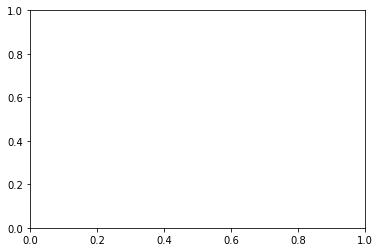

In [17]:
fig, ax = plt.subplots()


In [24]:
df.groupBy( col("Date") ).agg(_mean("TEMP")).show()

NameError: name 'year' is not defined